# Udacity driving log csv file Histogram Analysis and Processing

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, colors
from matplotlib.ticker import PercentFormatter
import numpy as np
import csv

# Fixing random state for reproducibility
np.random.seed(19680801)

In [2]:
def loadCSVFile(csv_filename):
    """ 
    Loads csv file into a list of lists
    Each element in the outer list is a row of the csv file
    """
    rows = []
    with open(csv_filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            rows += [row]
    
    return rows





In [3]:
CSV_FILENAME = "driving_log_udacity.csv"
STEERING_ANGLE_IDX = 3

file_rows = loadCSVFile( CSV_FILENAME )
N = len(file_rows) - 1 
print(N)
#print(file_rows[:3])

steering_angles = []
for i in range(1,N):
    steering_angles.append( float( file_rows[i][STEERING_ANGLE_IDX] ) )

8036


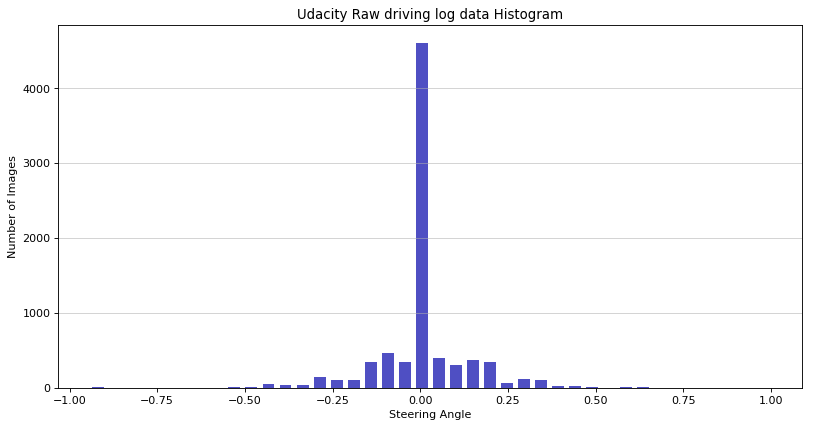

In [4]:
d = np.random.laplace(loc=15, scale=3, size=500)

# An "interface" to matplotlib.axes.Axes.hist() method
figure(figsize=(12, 6), dpi=80)
n, bins, patches = plt.hist(x=steering_angles, bins=40, color='#0504aa',
                            alpha=0.7, rwidth=0.7)
plt.grid(axis='y', alpha=0.6)
plt.title('Udacity Raw driving log data Histogram')
plt.xlabel('Steering Angle')
plt.ylabel('Number of Images')
plt.show()

In [5]:
nearZeroSteering_idxes = []
count = 0
for i in range(N-1):
    if abs( steering_angles[i] ) < 0.05:
        count += 1
        #print(steering_angles[i])
        nearZeroSteering_idxes.append(i)
        

print(count)

NUMBER_OF_ALL_IMAGES = N
NUMBER_OF_IMAGES_WITH_NEAR_ZERO_STEERING = 1200 

savedImages_idxes = []

for i in range(NUMBER_OF_ALL_IMAGES):
    
    if i not in nearZeroSteering_idxes:
        savedImages_idxes.append(i)


        
print(len(savedImages_idxes))    

# Need to pick randomly from the near zero...
import random as rd

already_added = []
for i in range(NUMBER_OF_IMAGES_WITH_NEAR_ZERO_STEERING):

    random_idx = rd.randint(0, NUMBER_OF_IMAGES_WITH_NEAR_ZERO_STEERING - 1)
    while random_idx in already_added:
            random_idx = rd.randint(0, NUMBER_OF_IMAGES_WITH_NEAR_ZERO_STEERING - 1)
            #print(random_idx, " is already added")
            
    savedImages_idxes.append(nearZeroSteering_idxes[ random_idx ])
    already_added.append(random_idx)

print(len(savedImages_idxes))    

#print(savedImages_idxes)

4880
3156
4356


### Customize CSV File

In [6]:
#print(file_rows[0])
filtered_file_rows = [ file_rows[0] ]
for i in range(N):
    if i in savedImages_idxes:
        filtered_file_rows.append(file_rows[i+1])

print(filtered_file_rows[:5])

[['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'], ['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829'], ['IMG/center_2016_12_01_13_30_48_404.jpg', ' IMG/left_2016_12_01_13_30_48_404.jpg', ' IMG/right_2016_12_01_13_30_48_404.jpg', ' 0', ' 0', ' 0', ' 21.87963'], ['IMG/center_2016_12_01_13_31_12_937.jpg', ' IMG/left_2016_12_01_13_31_12_937.jpg', ' IMG/right_2016_12_01_13_31_12_937.jpg', ' 0', ' 0', ' 0', ' 1.453011'], ['IMG/center_2016_12_01_13_31_13_037.jpg', ' IMG/left_2016_12_01_13_31_13_037.jpg', ' IMG/right_2016_12_01_13_31_13_037.jpg', ' 0', ' 0', ' 0', ' 1.438419']]


## Save CSV files

In [7]:
filtered_filename = "filtered_driving_log_1200_rd.csv"

with open(filtered_filename, mode='w', newline='') as output_file:
    driving_writer = csv.writer(output_file)
    for row in filtered_file_rows:
        driving_writer.writerow(row)

### Reload filtered driving log

8036
[['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'], ['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829'], ['IMG/center_2016_12_01_13_30_48_404.jpg', ' IMG/left_2016_12_01_13_30_48_404.jpg', ' IMG/right_2016_12_01_13_30_48_404.jpg', ' 0', ' 0', ' 0', ' 21.87963']]


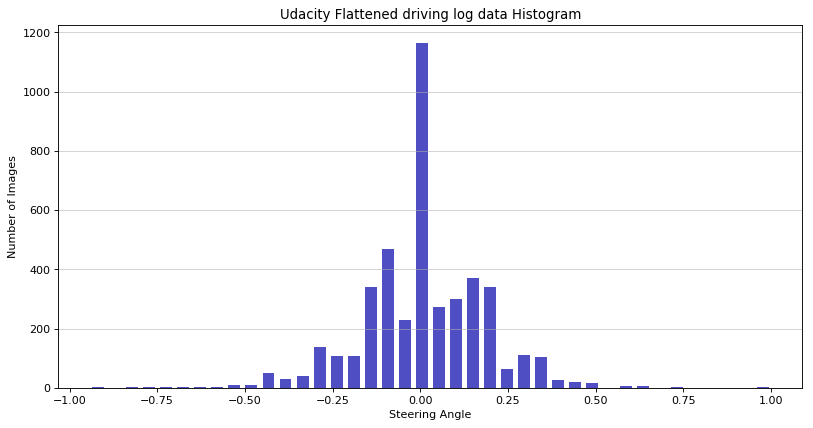

In [8]:
reloaded_file_rows = loadCSVFile( filtered_filename )
N2 = len(reloaded_file_rows) - 1 
print(N)
print(reloaded_file_rows[:3])

reloaded_steering_angles = []
for i in range(1,N2):
    try:
        reloaded_steering_angles.append( float( reloaded_file_rows[i][STEERING_ANGLE_IDX] ) )
    except:
        print("EXCEPTION")
    

# An "interface" to matplotlib.axes.Axes.hist() method
figure(figsize=(12, 6), dpi=80)
n, bins, patches = plt.hist(x=reloaded_steering_angles, bins=40, color='#0504aa',
                            alpha=0.7, rwidth=0.7)
plt.grid(axis='y', alpha=0.6)
plt.xlabel('Steering Angle')
plt.ylabel('Number of Images')
plt.title('Udacity Flattened driving log data Histogram')
plt.show()